#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

* Erick de Jesus Hernández Cerecedo - A01066428
* Johan Andres Castro Gomez - A01793556
* David Valles Canedo - A01191310
* Octavio Edelberto Reyes Torres - A00269987
* Francisco Xavier Bastidas Moreno - A01794188


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyRegressor

from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.inspection import permutation_importance

#**Ejercicio-1.** 

In [ ]:
#path dataset
path = "Facebook_metrics\dataset_Facebook.csv"

#read data set as pandas data frame
df = pd.read_csv(path, sep = ";")

#Columns to be used in the modelo
columns = ['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday','Post Hour', 'Paid', 'Lifetime People who have liked your Page and engaged with your post']
df = df[columns]

#Rename output variable
df.rename(columns={'Lifetime People who have liked your Page and engaged with your post':'LPE'}, inplace=True)

df

Page total likes    Type  Category  Post Month  Post Weekday  Post Hour  \
0              139441   Photo         2          12             4          3   
1              139441  Status         2          12             3         10   
2              139441   Photo         3          12             3          3   
3              139441   Photo         2          12             2         10   
4              139441   Photo         2          12             2          3   
..                ...     ...       ...         ...           ...        ...   
495             85093   Photo         3           1             7          2   
496             81370   Photo         2           1             5          8   
497             81370   Photo         1           1             5          2   
498             81370   Photo         3           1             4         11   
499             81370   Photo         2           1             4          4   

     Paid   LPE  
0     0.0   119  
1     0.0  1108  
2     0.0   132  
3     1.0  1386  
4     0.0   396  
..    ...   ...  
495   0.0   392  
496   0.0   301  
497   0.0   363  
498   0.0   370  
499   NaN   316  

[500 rows x 8 columns]

#**Ejercicio-2.**

In [ ]:
#Partición de datos, 400 registros para entrenamiento y 100 para test
X_train, X_test, y_train, y_test = train_test_split(df.drop('LPE', axis=1), df[['LPE']], test_size = 100)

#**Ejercicio-3.**

In [ ]:
#Defiición - RMSE
def mi_RMSE(yreal, ypred):
    return np.sqrt(np.mean(np.square(yreal-ypred)))

#Defiición - MAE
def mi_MAE(yreal, ypred):
    return np.mean(np.abs(yreal - ypred))

#Defiición - MAPE
def mi_MAPE(yreal, ypred):
    return np.mean(np.abs((yreal - ypred)/yreal))

#**Ejercicio-4.**

In [ ]:
df.isnull().any()

Page total likes    False
Type                False
Category            False
Post Month          False
Post Weekday        False
Post Hour           False
Paid                 True
LPE                 False
dtype: bool

In [ ]:
df[df['Paid'].isnull()]

Page total likes   Type  Category  Post Month  Post Weekday  Post Hour  \
499             81370  Photo         2           1             4          4   

     Paid  LPE  
499   NaN  316

(array([ 18.,  14.,  16.,  19.,  26.,  17.,  29.,  42.,  66., 153.]),
 array([ 81370. ,  87177.1,  92984.2,  98791.3, 104598.4, 110405.5,
        116212.6, 122019.7, 127826.8, 133633.9, 139441. ]),
 <BarContainer object of 10 artists>)

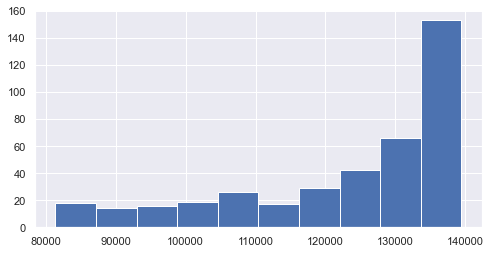

In [ ]:
plt.hist(X_train['Page total likes'])

(array([227., 104.,  28.,  15.,  12.,   7.,   1.,   3.,   0.,   3.]),
 array([   9. ,  445.7,  882.4, 1319.1, 1755.8, 2192.5, 2629.2, 3065.9,
        3502.6, 3939.3, 4376. ]),
 <BarContainer object of 10 artists>)

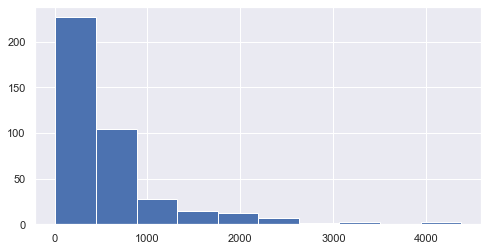

In [ ]:
plt.hist(y_train['LPE'])

In [ ]:
#Pipeline variables númericas
#numerical_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')), ('num_transformation', StandardScaler())]) 
#numerical_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')), ('num_transformation', PowerTransformer(method='yeo-johnson'))])
numerical_pipeline = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')), ('num_transformation', PowerTransformer(method='yeo-johnson')), ('num_transformation2', MinMaxScaler((1,2)))]) 

#Pipeline variable categoricas
categorical_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('encoder', OneHotEncoder(handle_unknown="ignore"))]) 

In [ ]:
X_v_num = ['Page total likes']
X_v_cat = ['Type', 'Category', 'Post Month', 'Post Weekday','Post Hour', 'Paid']

y_v_num = ['LPE']

In [ ]:
x_col_transform = ColumnTransformer(
                                    transformers=
                                    [('numerical_t',numerical_pipeline, X_v_num),
                                    ('category_t',categorical_pipeline,X_v_cat)],
                                    remainder='passthrough'
                                    )
y_col_transform = ColumnTransformer(
                                    transformers=
                                    [('numerical_t',numerical_pipeline, y_v_num)],
                                    remainder='passthrough'
                                    )

X_fit = x_col_transform.fit(X_train)
y_fit = y_col_transform.fit(y_train)

X_train_t = X_fit.transform(X_train).toarray()
X_test_t = X_fit.transform(X_test).toarray()

y_train_t = y_fit.transform(y_train)
y_test_t = y_fit.transform(y_test)

(array([44., 28., 30., 32., 14., 33., 29., 40., 61., 89.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

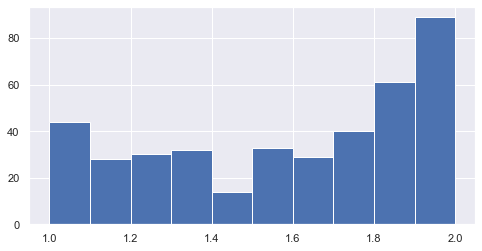

In [ ]:
plt.hist(X_train_t[:,0])

(array([ 1.,  0.,  1.,  6., 20., 38., 17., 11.,  4.,  2.]),
 array([1.06126711, 1.15222119, 1.24317528, 1.33412936, 1.42508345,
        1.51603753, 1.60699161, 1.6979457 , 1.78889978, 1.87985387,
        1.97080795]),
 <BarContainer object of 10 artists>)

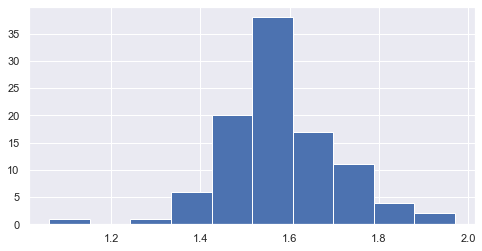

In [ ]:
plt.hist(y_test_t)

#**Ejercicio-5.**

In [ ]:
X_train_dummy, X_valid_dummy, y_train_dummy, y_valid_dummy = train_test_split(X_train_t,y_train_t, test_size = 100)
dummy_regr = DummyRegressor(strategy="median")

dummy_model = dummy_regr.fit(X_train_dummy,y_train_dummy)

y_pred_train = dummy_model.predict(X_train_dummy)
y_pred_valid = dummy_model.predict(X_valid_dummy)

print('RMSE Entrenamineto: ' + str(mi_RMSE(y_train_dummy,y_pred_train)) +
      '\nRMSE Validación: ' + str(mi_RMSE(y_valid_dummy,y_pred_valid)) +
      '\nMAE Entrenamineto: ' + str(mi_MAE(y_train_dummy,y_pred_train)) +
      '\nMAE Validación: ' + str(mi_MAE(y_valid_dummy,y_pred_valid)) +
      '\nMAPE Entrenamineto: ' + str(mi_MAPE(y_train_dummy,y_pred_train)) +
      '\nMAPE Validación: ' + str(mi_MAPE(y_valid_dummy,y_pred_valid))
    )

RMSE Entrenamineto: 0.14329963981533192
RMSE Validación: 0.1489642135906887
MAE Entrenamineto: 0.10223208928302042
MAE Validación: 0.10462543388335403
MAPE Entrenamineto: 0.06561292081406604
MAPE Validación: 0.06947732796372605


#**Ejercicio-6.**

In [ ]:
model_name = []
models = []

# Regresión lineal multiple
model_name.append('Regresión lineal multiple')
models.append(LinearRegression())

#Regresión lineal multiple-Ridge
model_name.append('RLM-Ridge')
models.append(Ridge())

#Regresión lineal multiple-Lasso
model_name.append('RLM-Lasso')
models.append(Lasso())

# Random forest
model_name.append('Random forest')
models.append(RandomForestRegressor())

#Perceptrón multicapa
model_name.append('Perceptrón multicapa')
models.append(MLPRegressor(max_iter=1000))

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
metrics = {'RMSE': make_scorer(mi_RMSE), 'MAE': make_scorer(mi_MAE), 'MAPE': make_scorer(mi_MAPE)}

In [ ]:
metrics.keys()

dict_keys(['RMSE', 'MAE', 'MAPE'])

In [ ]:
results = []

for i, model in enumerate(models):
    
    kfold = RepeatedKFold(n_splits=5, n_repeats=3)

    scores = cross_validate(
                            estimator = model,
                            X = X_train_t,
                            y = y_train_t.ravel(),
                            scoring=metrics,
                            cv = kfold,
                            return_train_score=True
                            )

    results.append(scores)

    print(model_name[i])
    for metric in metrics.keys():
        print(
            '\t%s\n\t\tTrain: %.3f (%.4f)\n\t\tTest: %.3f (%.4f)' % (
                                                                metric,
                                                                np.mean(scores['train_'+ metric]), np.std(scores['train_'+ metric]),
                                                                np.mean(scores['test_'+ metric]), np.std(scores['test_'+ metric])
                                                                )
        )
        

Regresión lineal multiple
	RMSE
		Train: 0.142 (0.0710)
		Test: 39306152667.432 (80703309849.4884)
	MAE
		Train: 0.103 (0.0578)
		Test: 5414382965.024 (10866567284.8303)
	MAPE
		Train: 0.067 (0.0373)
		Test: 3504917715.803 (6963670371.6000)
RLM-Ridge
	RMSE
		Train: 0.110 (0.0037)
		Test: 0.124 (0.0138)
	MAE
		Train: 0.076 (0.0023)
		Test: 0.087 (0.0086)
	MAPE
		Train: 0.050 (0.0016)
		Test: 0.057 (0.0057)
RLM-Lasso
	RMSE
		Train: 0.145 (0.0033)
		Test: 0.144 (0.0134)
	MAE
		Train: 0.103 (0.0028)
		Test: 0.104 (0.0109)
	MAPE
		Train: 0.067 (0.0019)
		Test: 0.067 (0.0074)
Random forest
	RMSE
		Train: 0.048 (0.0013)
		Test: 0.126 (0.0078)
	MAE
		Train: 0.033 (0.0006)
		Test: 0.089 (0.0045)
	MAPE
		Train: 0.022 (0.0004)
		Test: 0.058 (0.0035)
Perceptrón multicapa
	RMSE
		Train: 0.108 (0.0037)
		Test: 0.146 (0.0083)
	MAE
		Train: 0.080 (0.0035)
		Test: 0.109 (0.0085)
	MAPE
		Train: 0.052 (0.0022)
		Test: 0.070 (0.0054)


#**Ejercicio-7.**

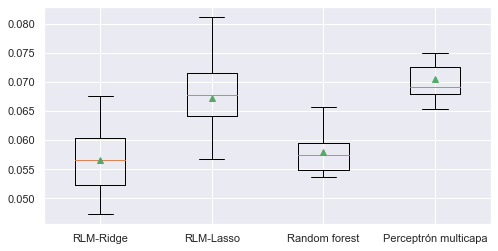

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})

mape_r = list()
for i in range(1,5):
  rr = results[i]['test_MAPE']
  mape_r.append(rr)

plt.boxplot(mape_r, labels=model_name[1:], showmeans=True, showfliers = False)
plt.show()

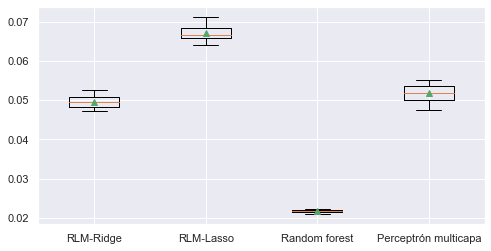

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})

mape_r = list()
for i in range(1,5):
  rr = results[i]['train_MAPE']
  mape_r.append(rr)

plt.boxplot(mape_r, labels=model_name[1:], showmeans=True, showfliers = False)
plt.show()

#**Ejercicio-8.**

In [ ]:
modelo_mlp_gs = MLPRegressor(max_iter=1000)
modelo_mlp_gs.get_params()


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
modelo_mlp_gs = MLPRegressor(max_iter=500)
kfold = RepeatedKFold(n_splits=5, n_repeats=3)

Parametros = {'hidden_layer_sizes':[(50,30,10), (150,100,50), (20,20,2),(300,), (200,),(100,)],  
              'alpha': [0.001, 0.0001, 0.00001], 
              'learning_rate_init':[0.05, 0.001],
              'learning_rate': ['constant','adaptive'],
              'activation': ['tanh', 'relu'],
              'solver': ['sgd', 'adam']
              }

mlp_gridFinal = GridSearchCV(estimator=modelo_mlp_gs, param_grid = Parametros, scoring = make_scorer(mi_MAPE, greater_is_better=False), cv = kfold, n_jobs = -1)
                            
mlp_gridFinal.fit(X_train_t, np.ravel(y_train_t))

mlp_best_score = mlp_gridFinal.best_score_
mlp_best_param = mlp_gridFinal.best_params_
print("El mejor score es:", mlp_best_score)
print("El mejor parametro es: \n", mlp_best_param)

El mejor score es: -0.05601167270673306
El mejor parametro es: 
 {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (300,), 'learning_rate': 'constant', 'learning_rate_init': 0.05, 'solver': 'sgd'}


Text(0, 0.5, 'y_train_predict')

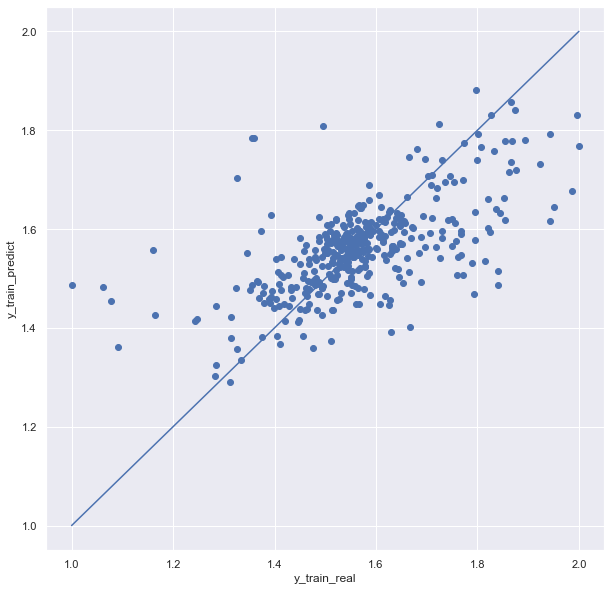

In [ ]:
figure, ax = plt.subplots(figsize=(10,10))
yhat = mlp_gridFinal.predict(X_train_t)

plt.scatter(y_train_t.ravel(),yhat)
line= np.linspace(min(y_train_t),max(y_train_t),10)
plt.plot(line, line)
plt.xlabel("y_train_real")
plt.ylabel("y_train_predict")

#**Ejercicio-9.**

Feature: 0, Score: 0.84023
Feature: 1, Score: 0.09424
Feature: 2, Score: 0.00043
Feature: 3, Score: 0.45040
Feature: 4, Score: 0.01063
Feature: 5, Score: 0.64485
Feature: 6, Score: 0.35518
Feature: 7, Score: 0.37567
Feature: 8, Score: 0.11437
Feature: 9, Score: 0.23014
Feature: 10, Score: 0.06185
Feature: 11, Score: 0.15146
Feature: 12, Score: 0.04274
Feature: 13, Score: 0.01038
Feature: 14, Score: 0.01204
Feature: 15, Score: 0.01138
Feature: 16, Score: 0.02046
Feature: 17, Score: 0.17155
Feature: 18, Score: 0.37454
Feature: 19, Score: 0.35383
Feature: 20, Score: 0.05874
Feature: 21, Score: 0.02632
Feature: 22, Score: 0.06057
Feature: 23, Score: 0.05223
Feature: 24, Score: 0.01427
Feature: 25, Score: 0.03028
Feature: 26, Score: 0.02283
Feature: 27, Score: 0.00015
Feature: 28, Score: 0.00084
Feature: 29, Score: 0.01378
Feature: 30, Score: 0.00603
Feature: 31, Score: 0.00185
Feature: 32, Score: 0.00069
Feature: 33, Score: 0.00168
Feature: 34, Score: 0.00481
Feature: 35, Score: 0.00060
Fe

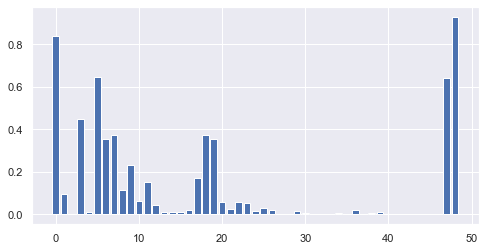

In [ ]:
modelo_MLP_F = MLPRegressor()  
modelo_MLP_F.set_params(**mlp_best_param)

modelo_MLP_F.fit(X_train_t, np.ravel(y_train_t))

importance_MLP = permutation_importance(modelo_MLP_F, X_train_t, np.ravel(y_train_t), n_repeats=100)

for i,v in enumerate(importance_MLP['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance_MLP['importances_mean']))], importance_MLP['importances_mean'])
plt.show()


#**Ejercicio-10.**

In [ ]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
modelo_rf_gs = RandomForestRegressor()
kfold = RepeatedKFold(n_splits=5, n_repeats=3)

Parametros = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1000, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
              }

rf_gridFinal = RandomizedSearchCV(estimator=modelo_rf_gs, param_distributions = Parametros, scoring =  make_scorer(mi_MAPE, greater_is_better=False), cv = kfold, n_iter=1000,n_jobs=-1)
                            
rf_gridFinal.fit(X_train_t, np.ravel(y_train_t))

rf_best_score = rf_gridFinal.best_score_
rf_best_param = rf_gridFinal.best_params_
print("El mejor score es:", rf_best_score)
print("El mejor parametro es: \n", rf_best_param)

El mejor score es: -0.053850290234529447
El mejor parametro es: 
 {'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


Text(0, 0.5, 'y_train_predict')

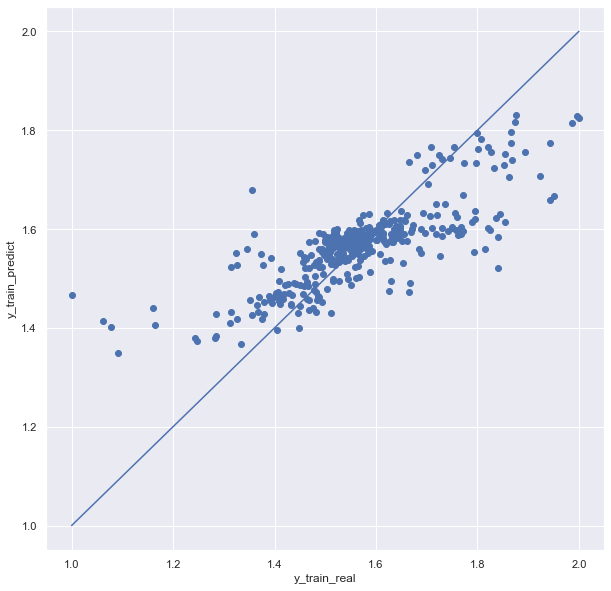

In [ ]:
figure, ax = plt.subplots(figsize=(10,10))
yhat = rf_gridFinal.predict(X_train_t)

plt.scatter(y_train_t.ravel(),yhat)
line= np.linspace(min(y_train_t),max(y_train_t),10)
plt.plot(line, line)
plt.xlabel("y_train_real")
plt.ylabel("y_train_predict")

Feature: 0, Score: 0.15291
Feature: 1, Score: 0.08660
Feature: 2, Score: 0.09910
Feature: 3, Score: 0.15837
Feature: 4, Score: 0.00501
Feature: 5, Score: 0.02470
Feature: 6, Score: 0.04434
Feature: 7, Score: 0.01607
Feature: 8, Score: 0.00162
Feature: 9, Score: 0.01249
Feature: 10, Score: 0.01511
Feature: 11, Score: 0.00662
Feature: 12, Score: 0.00123
Feature: 13, Score: 0.00519
Feature: 14, Score: 0.00578
Feature: 15, Score: 0.00460
Feature: 16, Score: 0.00401
Feature: 17, Score: 0.01808
Feature: 18, Score: 0.02145
Feature: 19, Score: 0.02037
Feature: 20, Score: 0.00576
Feature: 21, Score: 0.03087
Feature: 22, Score: 0.01645
Feature: 23, Score: 0.01156
Feature: 24, Score: 0.01278
Feature: 25, Score: 0.00524
Feature: 26, Score: 0.01714
Feature: 27, Score: 0.00016
Feature: 28, Score: 0.00651
Feature: 29, Score: 0.00588
Feature: 30, Score: 0.01039
Feature: 31, Score: 0.00327
Feature: 32, Score: 0.00239
Feature: 33, Score: 0.00067
Feature: 34, Score: 0.00742
Feature: 35, Score: 0.00629
Fe

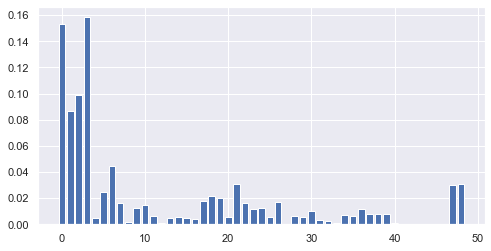

In [ ]:
modelo_rf_F = RandomForestRegressor()  
modelo_rf_F.set_params(**rf_best_param)

modelo_rf_F.fit(X_train_t, np.ravel(y_train_t))

importance_rf = permutation_importance(modelo_rf_F, X_train_t, np.ravel(y_train_t), n_repeats=100)

for i,v in enumerate(importance_rf['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance_rf['importances_mean']))], importance_rf['importances_mean'])
plt.show()


#**Ejercicio-11.**

In [ ]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [ ]:
modelo_lr_gs = Ridge()
kfold = RepeatedKFold(n_splits=5, n_repeats=3)

Parametros = {'alpha': [1.0, 2.0,5.0,10.0],
              'normalize': [True, False],
              'fit_intercept': [True, False],
              'solver':  ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
              }

lr_gridFinal = GridSearchCV(estimator=modelo_lr_gs, param_grid = Parametros, scoring =  make_scorer(mi_MAPE, greater_is_better=False), cv = kfold, n_jobs=-1)
                            
lr_gridFinal.fit(X_train_t, np.ravel(y_train_t))

lr_best_score = lr_gridFinal.best_score_
lr_best_param = lr_gridFinal.best_params_
print("El mejor score es:", lr_best_score)
print("El mejor parametro es: \n", lr_best_param)

El mejor score es: -0.05540645354718128
El mejor parametro es: 
 {'alpha': 5.0, 'fit_intercept': True, 'normalize': False, 'solver': 'sparse_cg'}


c:\Users\castrogomez.j\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Text(0, 0.5, 'y_train_predict')

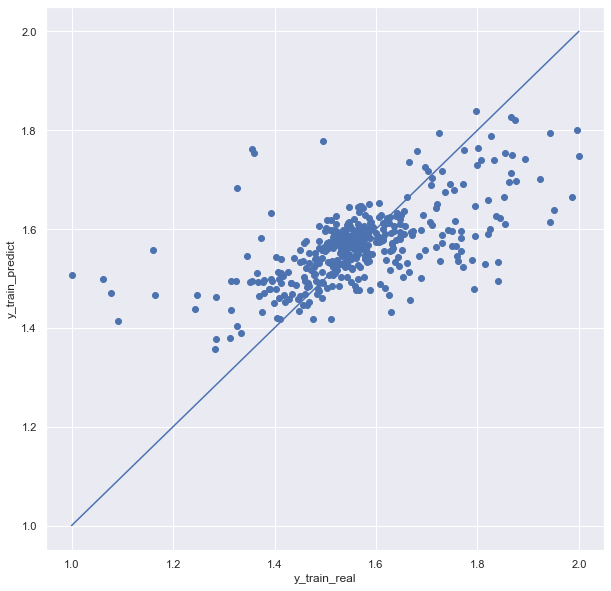

In [ ]:
figure, ax = plt.subplots(figsize=(10,10))
yhat = lr_gridFinal.predict(X_train_t)

plt.scatter(y_train_t.ravel(),yhat)
line= np.linspace(min(y_train_t),max(y_train_t),10)
plt.plot(line, line)
plt.xlabel("y_train_real")
plt.ylabel("y_train_predict")

c:\Users\castrogomez.j\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Feature: 0, Score: 0.02269
Feature: 1, Score: 0.15089
Feature: 2, Score: 0.03360
Feature: 3, Score: 0.22312
Feature: 4, Score: 0.00672
Feature: 5, Score: 0.00275
Feature: 6, Score: 0.00038
Feature: 7, Score: 0.00081
Feature: 8, Score: 0.00026
Feature: 9, Score: 0.01347
Feature: 10, Score: 0.01632
Feature: 11, Score: 0.00700
Feature: 12, Score: 0.00219
Feature: 13, Score: 0.00705
Feature: 14, Score: 0.00078
Feature: 15, Score: 0.00398
Feature: 16, Score: 0.00770
Feature: 17, Score: 0.00280
Feature: 18, Score: 0.03948
Feature: 19, Score: 0.02315
Feature: 20, Score: 0.00131
Feature: 21, Score: 0.00035
Feature: 22, Score: 0.00240
Feature: 23, Score: 0.00189
Feature: 24, Score: 0.00309
Feature: 25, Score: 0.00008
Feature: 26, Score: 0.00222
Feature: 27, Score: 0.00035
Feature: 28, Score: 0.00067
Feature: 29, Score: 0.00390
Feature: 30, Score: 0.00622
Feature: 31, Score: 0.00350
Feature: 32, Score: 0.00107
Feature: 33, Score: 0.00043
Feature: 34, Score: 0.00717
Feature: 35, Score: 0.00000
Fe

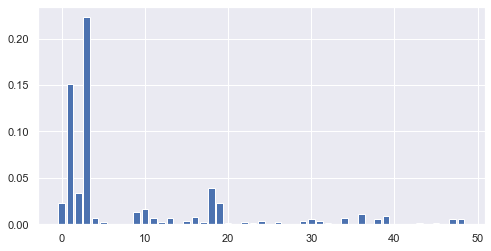

In [ ]:
modelo_lr_F = Ridge()
modelo_lr_F.set_params(**lr_best_param)

modelo_lr_F.fit(X_train_t, np.ravel(y_train_t))

importance_lr = permutation_importance(modelo_lr_F, X_train_t, np.ravel(y_train_t), n_repeats=100)

for i,v in enumerate(importance_lr['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance_lr['importances_mean']))], importance_lr['importances_mean'])
plt.show()

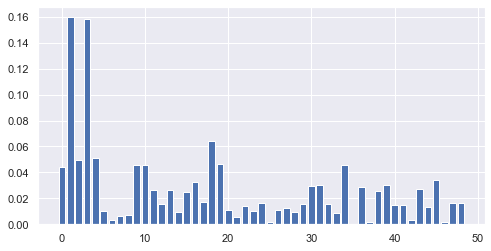

In [ ]:
modelo_lr_F.coef_
plt.bar([x for x in range(len(importance_lr['importances_mean']))], np.abs(modelo_lr_F.coef_))
plt.show()

In [ ]:
modelo_lr_F.intercept_

1.6709267322247947

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**